# Laboratoire 6
- Segmentation de contours

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
from skimage.feature import canny
from scipy.ndimage import gaussian_filter, convolve, correlate
from math import sin, cos, tan, radians

## Exercice 1
Implémenter en partie le filtre de Sobel:
1. Si l'image est bruité, appliquer un filtre gaussian
2. Trouver les contours
    - Trouver les gradients X
    - Trouver les gradients Y
2. Combiner les gradients pour obtenir le résultat final

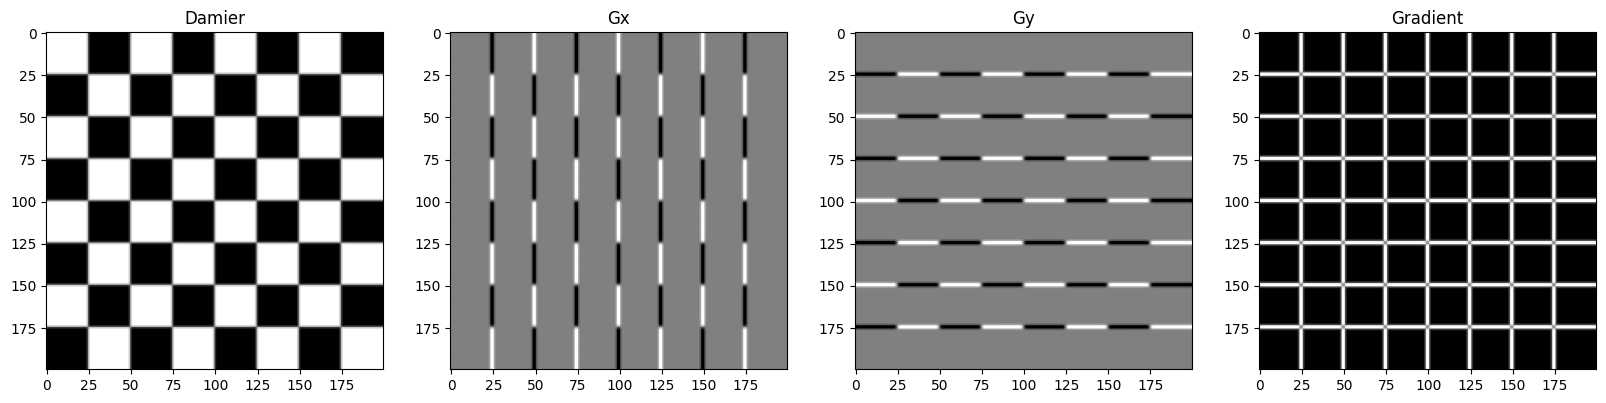

In [10]:
img = skimage.data.checkerboard().astype(np.int64)

hy = [[-1,-2,-1],[0,0,0],[1,2,1]]
hx = [[-1,0,1],[-2,0,2],[-1,0,1]]

plt.figure(figsize=(20,20))

plt.subplot(141); plt.title('Damier'); plt.imshow(img, cmap='gray')

gx = correlate(img, hx)
plt.subplot(142); plt.title('Gx'); plt.imshow(gx, cmap='gray')

gy = correlate(img,hy)
plt.subplot(143); plt.title('Gy'); plt.imshow(gy, cmap='gray')

g = np.sqrt(np.pow(gx,2) + np.pow(gy,2))
plt.subplot(144); plt.title('Gradient'); plt.imshow(g, cmap='gray')

plt.show()

## Exercice 2
Appliquer la méthode de Canny avec différentes valeurs pour le *sigma* et les *thresholds*.

In [12]:
help(canny)

Help on function canny in module skimage.feature._canny:

canny(
    image,
    sigma=1.0,
    low_threshold=None,
    high_threshold=None,
    mask=None,
    use_quantiles=False,
    *,
    mode='constant',
    cval=0.0
)
    Edge filter an image using the Canny algorithm.

    Parameters
    ----------
    image : 2D array
        Grayscale input image to detect edges on; can be of any dtype.
    sigma : float, optional
        Standard deviation of the Gaussian filter.
    low_threshold : float, optional
        Lower bound for hysteresis thresholding (linking edges).
        If None, low_threshold is set to 10% of dtype's max.
    high_threshold : float, optional
        Upper bound for hysteresis thresholding (linking edges).
        If None, high_threshold is set to 20% of dtype's max.
    mask : array, dtype=bool, optional
        Mask to limit the application of Canny to a certain area.
    use_quantiles : bool, optional
        If ``True`` then treat low_threshold and high_thr

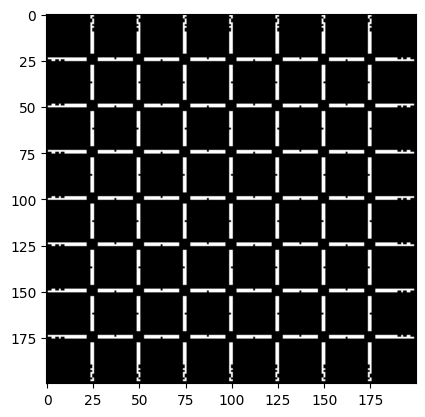

In [25]:
img=img.astype(np.uint32) # L M A O 

cannied = canny(img,sigma=3, low_threshold=100, high_threshold=155)
plt.imshow(cannied, cmap="grey")
plt.show()

## Exercice 3
Tracer la courbe des points **(x:3, y:9)** et **(x:10, y:5)** dans l'espace paramètre de la transformer de Hough

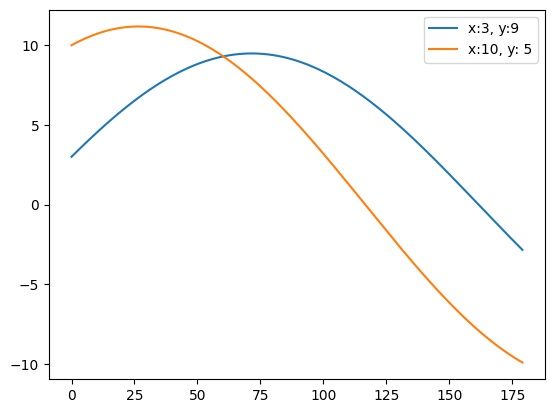

In [13]:
rhos = []
thetas = range(0,180)

for theta in thetas:
    rho= 3 * ( np.cos(radians(theta))) + 9 * (np.sin(radians(theta)))
    rhos.append(rho)

plt.plot(thetas, rhos, label='x:3, y:9')
rhos.clear()

for theta in thetas:
    rho= 10 * ( np.cos(radians(theta))) + 5 * (np.sin(radians(theta)))
    rhos.append(rho)

plt.plot(thetas, rhos, label='x:10, y: 5')

plt.legend()

plt.show()
                


Afficher maintenant la droite trouvée avec l'intersection des 2 courbes dans le domaine de l'image.  
L'axe **X** de l'image est sur 15.

min index: (array([60], dtype=int64),)


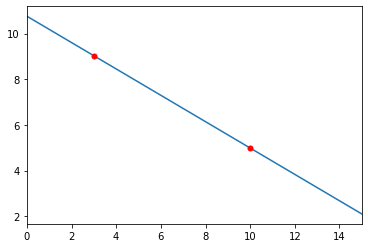